# Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import Data

In [47]:
df = pd.read_csv('./data/day.csv', dtype={
    'season': np.str,
    'yr': np.str,
    'mnth': np.str,
    'holiday': np.str,
    'workingday': np.str,
    'weathersit': np.str,
    'temp': np.float32,
    'atemp': np.float32,
    'hum': np.float32,
    'windspeed': np.float32,
    'casual': np.float32,
    'registered': np.float32
})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [48]:
df.dtypes

instant         int64
dteday         object
season         object
yr             object
mnth           object
holiday        object
weekday         int64
workingday     object
weathersit     object
temp          float32
atemp         float32
hum           float32
windspeed     float32
casual        float32
registered    float32
cnt             int64
dtype: object

# Drop Unecessary Data

In [49]:
df = df.drop(['instant', 'dteday', 'cnt'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0


In [50]:
target_casual = df.casual.to_frame()
target_registered = df.registered.to_frame()
non_nomalized_data = df.drop(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], axis=1)
normalized_data = df.loc[:, ['temp', 'atemp', 'hum', 'windspeed']]
data_casual = pd.concat([non_nomalized_data, target_casual], axis=1)
data_registered = pd.concat([non_nomalized_data, target_registered], axis=1)

In [51]:
data_casual.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,casual
0,1,0,1,0,6,0,2,331.0
1,1,0,1,0,0,0,2,131.0
2,1,0,1,0,1,1,1,120.0
3,1,0,1,0,2,1,1,108.0
4,1,0,1,0,3,1,1,82.0


In [52]:
data_registered.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,registered
0,1,0,1,0,6,0,2,654.0
1,1,0,1,0,0,0,2,670.0
2,1,0,1,0,1,1,1,1229.0
3,1,0,1,0,2,1,1,1454.0
4,1,0,1,0,3,1,1,1518.0


# Split Numerical & Categorical Data

In [53]:
categorical_data = data_casual.loc[:, ['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit']]
numerical_data_casual = data_casual.casual.to_frame()
numerical_data_registered = data_registered.registered.to_frame()

# Preprocessing Data

In [54]:
# normalization
sc_casual = StandardScaler()
sc_registered = StandardScaler()
sc_casual.fit(numerical_data_casual)
sc_registered.fit(numerical_data_registered)
normalized_casual = sc_casual.transform(numerical_data_casual)
normalized_registered = sc_registered.transform(numerical_data_registered)
normalized_casual = pd.DataFrame(normalized_casual, columns=numerical_data_casual.columns)
normalized_registered = pd.DataFrame(normalized_registered, columns=numerical_data_registered.columns)

In [55]:
normalized_casual.head()

,casual
0,-0.753734
1,-1.045214
2,-1.061246
3,-1.078734
4,-1.116627


In [56]:
normalized_registered.head()

,registered
0,-1.925471
1,-1.915209
2,-1.556689
3,-1.412383
4,-1.371336


In [57]:
# one hot encoding
temp_categorical_data = categorical_data.copy()
temp_categorical_data['season'] = temp_categorical_data['season'].astype(np.str)
new_categorical_data = pd.get_dummies(temp_categorical_data)
new_categorical_data.head()

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_10,mnth_11,mnth_12,...,mnth_7,mnth_8,mnth_9,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [58]:
new_data_casual = pd.concat([normalized_casual, new_categorical_data, normalized_data], axis=1)
new_data_registered = pd.concat([normalized_registered, new_categorical_data, normalized_data], axis=1)

In [59]:
new_data_casual.head()

,casual,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_10,mnth_11,...,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
0,-0.753734,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0.344167,0.363625,0.805833,0.160446
1,-1.045214,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539
2,-1.061246,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0.196364,0.189405,0.437273,0.248309
3,-1.078734,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0.200000,0.212122,0.590435,0.160296
4,-1.116627,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0.226957,0.229270,0.436957,0.186900


In [60]:
new_data_registered.head()

,registered,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_10,mnth_11,...,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
0,-1.925471,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0.344167,0.363625,0.805833,0.160446
1,-1.915209,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539
2,-1.556689,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0.196364,0.189405,0.437273,0.248309
3,-1.412383,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0.200000,0.212122,0.590435,0.160296
4,-1.371336,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0.226957,0.229270,0.436957,0.186900


# Train Test Split

In [63]:
X_casual = new_data_casual.drop(['casual'], axis=1)
y_casual = new_data_casual['casual']
X_registered = new_data_registered.drop(['registered'], axis=1)
y_registered = new_data_registered['registered']
X_train_casual, X_test_casual, y_train_casual, y_test_casual = train_test_split(X_casual, y_casual, test_size=0.1)
X_train_registered, X_test_registered, y_train_registered, y_test_registered = train_test_split(X_registered, y_registered, test_size=0.1)

In [65]:
X_train_casual.head()

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_10,mnth_11,mnth_12,...,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temp,atemp,hum,windspeed
428,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0.325833,0.303021,0.403333,0.334571
359,1,0,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,0.321739,0.315535,0.506957,0.239465
177,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0.682500,0.637004,0.658333,0.107588
684,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0.321667,0.324492,0.620417,0.152987
198,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0.746667,0.703925,0.651250,0.215804


# Modeling

In [66]:
# Linear Model for Casual
linear_model = LinearRegression()
linear_model.fit(X_train_casual, y_train_casual)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

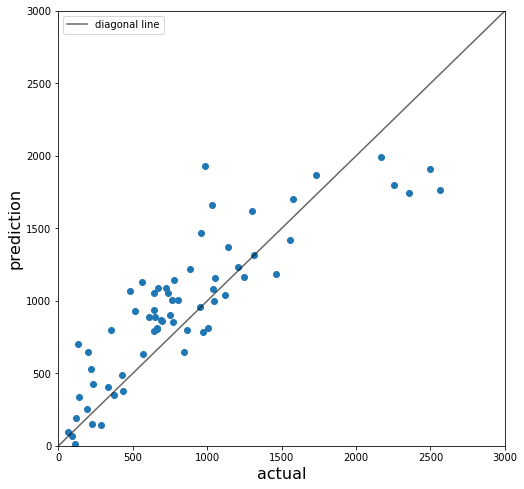

In [69]:
pred_casual = linear_model.predict(X_test_casual)
pred_casual = sc_casual.inverse_transform(pred_casual)
raw_y_test_casual = sc_casual.inverse_transform(y_test_casual)

plt.figure(figsize=(8,8))
plt.plot([5,3000], [5,3000], c='k', alpha=0.6, label='diagonal line') # diagonal line
plt.scatter(raw_y_test_casual, pred_casual)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('actual', fontsize=16)
plt.ylabel('prediction', fontsize=16)
plt.legend()

In [72]:
# Linear Model for Casual
rf_model = RandomForestRegressor(n_estimators=1000)
rf_model.fit(X_train_registered, y_train_registered)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

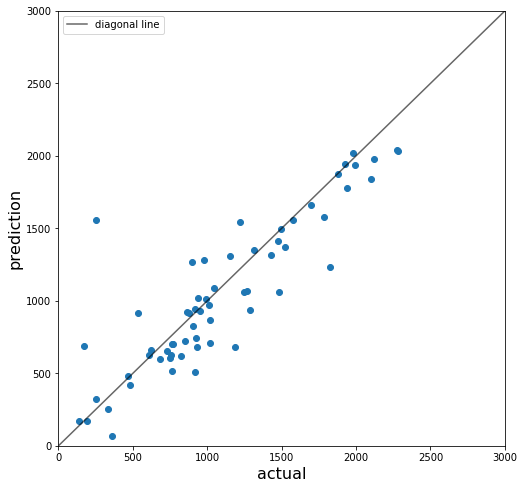

In [73]:
pred_registered = rf_model.predict(X_test_registered)
pred_registered = sc_casual.inverse_transform(pred_registered)
raw_y_test_regsitered = sc_casual.inverse_transform(y_test_registered)

plt.figure(figsize=(8,8))
plt.plot([5,3000], [5,3000], c='k', alpha=0.6, label='diagonal line') # diagonal line
plt.scatter(raw_y_test_regsitered, pred_registered)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('actual', fontsize=16)
plt.ylabel('prediction', fontsize=16)
plt.legend()